# Importing Libraries and Data

In [18]:
import sys
!{sys.executable} -m pip install quandl

In [70]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [22]:
# Enable inline plotting for Jupyter Notebook
%matplotlib inline


In [24]:
df= pd.read_csv(r'C:\users\Ali Hassan\Documents\US gun violence data analysis\Data\Prepared data\gun-violence-cleaned.csv', index_col= False)

In [26]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])


In [28]:
# Set date as the index
df.set_index('date', inplace=True)

In [30]:
# Display the first few rows
df.head()

incident_id           state city_or_county  \
date                                                     
2013-01-01       461105    Pennsylvania     Mckeesport   
2013-01-01       460726      California      Hawthorne   
2013-01-01       478855            Ohio         Lorain   
2013-01-05       478925        Colorado         Aurora   
2013-01-07       478959  North Carolina     Greensboro   

                                              address  n_killed  n_injured  \
date                                                                         
2013-01-01  1506 Versailles Avenue and Coursin Street         0          4   
2013-01-01               13500 block of Cerise Avenue         1          3   
2013-01-01                      1776 East 28th Street         1          3   
2013-01-05           16000 block of East Ithaca Place         4          0   
2013-01-07                  307 Mourning Dove Terrace         2          2   

                                                 incident_url  \
date                                                            
2013-01-01  http://www.gunviolencearchive.org/incident/461105   
2013-01-01  http://www.gunviolencearchive.org/incident/460726   
2013-01-01  http://www.gunviolencearchive.org/incident/478855   
2013-01-05  http://www.gunviolencearchive.org/incident/478925   
2013-01-07  http://www.gunviolencearchive.org/incident/478959   

                                                   source_url  \
date                                                            
2013-01-01  http://www.post-gazette.com/local/south/2013/0...   
2013-01-01  http://www.dailybulletin.com/article/zz/201301...   
2013-01-01  http://chronicle.northcoastnow.com/2013/02/14/...   
2013-01-05  http://www.dailydemocrat.com/20130106/aurora-s...   
2013-01-07  http://www.journalnow.com/news/local/article_d...   

            incident_url_fields_missing  congressional_district  ...  \
date                                                             ...   
2013-01-01                        False                      14  ...   
2013-01-01                        False                      43  ...   
2013-01-01                        False                       9  ...   
2013-01-05                        False                       6  ...   
2013-01-07                        False                       6  ...   

           longitude n_guns_involved  \
date                                   
2013-01-01  -79.8559               1   
2013-01-01 -118.3330               1   
2013-01-01  -82.1377               2   
2013-01-05 -104.8020               1   
2013-01-07  -79.9569               2   

                                                        notes  \
date                                                            
2013-01-01  Julian Sims under investigation: Four Shot and...   
2013-01-01  Four Shot; One Killed; Unidentified shooter in...   
2013-01-01                                            Unknown   
2013-01-05                                            Unknown   
2013-01-07  Two firearms recovered. (Attempted) murder sui...   

                                        participant_age_group  \
date                                                            
2013-01-01  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2013-01-01  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2013-01-01  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2013-01-05  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2013-01-07  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                                     participant_gender  \
date                                                      
2013-01-01         0::Male||1::Male||3::Male||4::Female   
2013-01-01                                      0::Male   
2013-01-01  0::Male||1::Male||2::Male||3::Male||4::Male   
2013-01-05         0::Female||1::Male||2::Male||3::Male   
2013-01-07       0::Female||1::Male||2::Male||3::Female   

                                  

# Subset data

In [33]:
# Filter data for a specific time period (e.g., last 5 years)
df_subset = df[df.index >= '2013-01-01']


In [35]:
# Reset index and reassign date as index
df_subset = df_subset.reset_index().set_index("date")


In [37]:
# Display the subset
df_subset.head()

incident_id           state city_or_county  \
date                                                     
2013-01-01       461105    Pennsylvania     Mckeesport   
2013-01-01       460726      California      Hawthorne   
2013-01-01       478855            Ohio         Lorain   
2013-01-05       478925        Colorado         Aurora   
2013-01-07       478959  North Carolina     Greensboro   

                                              address  n_killed  n_injured  \
date                                                                         
2013-01-01  1506 Versailles Avenue and Coursin Street         0          4   
2013-01-01               13500 block of Cerise Avenue         1          3   
2013-01-01                      1776 East 28th Street         1          3   
2013-01-05           16000 block of East Ithaca Place         4          0   
2013-01-07                  307 Mourning Dove Terrace         2          2   

                                                 incident_url  \
date                                                            
2013-01-01  http://www.gunviolencearchive.org/incident/461105   
2013-01-01  http://www.gunviolencearchive.org/incident/460726   
2013-01-01  http://www.gunviolencearchive.org/incident/478855   
2013-01-05  http://www.gunviolencearchive.org/incident/478925   
2013-01-07  http://www.gunviolencearchive.org/incident/478959   

                                                   source_url  \
date                                                            
2013-01-01  http://www.post-gazette.com/local/south/2013/0...   
2013-01-01  http://www.dailybulletin.com/article/zz/201301...   
2013-01-01  http://chronicle.northcoastnow.com/2013/02/14/...   
2013-01-05  http://www.dailydemocrat.com/20130106/aurora-s...   
2013-01-07  http://www.journalnow.com/news/local/article_d...   

            incident_url_fields_missing  congressional_district  ...  \
date                                                             ...   
2013-01-01                        False                      14  ...   
2013-01-01                        False                      43  ...   
2013-01-01                        False                       9  ...   
2013-01-05                        False                       6  ...   
2013-01-07                        False                       6  ...   

           longitude n_guns_involved  \
date                                   
2013-01-01  -79.8559               1   
2013-01-01 -118.3330               1   
2013-01-01  -82.1377               2   
2013-01-05 -104.8020               1   
2013-01-07  -79.9569               2   

                                                        notes  \
date                                                            
2013-01-01  Julian Sims under investigation: Four Shot and...   
2013-01-01  Four Shot; One Killed; Unidentified shooter in...   
2013-01-01                                            Unknown   
2013-01-05                                            Unknown   
2013-01-07  Two firearms recovered. (Attempted) murder sui...   

                                        participant_age_group  \
date                                                            
2013-01-01  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2013-01-01  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2013-01-01  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2013-01-05  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2013-01-07  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                                     participant_gender  \
date                                                      
2013-01-01         0::Male||1::Male||3::Male||4::Female   
2013-01-01                                      0::Male   
2013-01-01  0::Male||1::Male||2::Male||3::Male||4::Male   
2013-01-05         0::Female||1::Male||2::Male||3::Male   
2013-01-07       0::Female||1::Male||2::Male||3::Female   

                                  

###  Why We Selected This Subset
- The dataset includes a long history, but for better trend analysis, we filter it to **start from 2013**.
- This avoids older, less relevant records that may bias the analysis.
- The **"date"** column is reset and then re-indexed to ensure proper time-series formatting.

# Line chart Visualizations

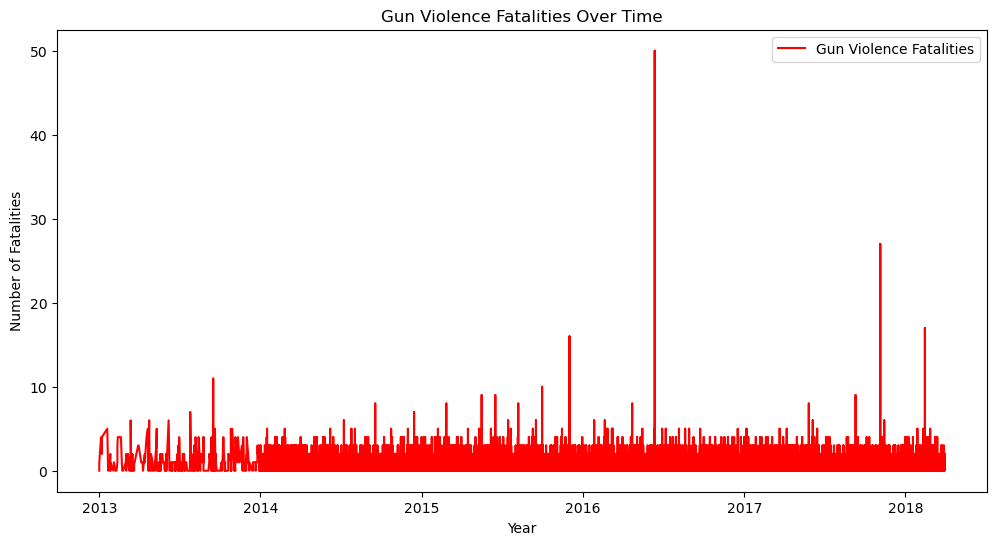

In [43]:
plt.figure(figsize=(12,6))
plt.plot(df_subset['n_killed'], label="Gun Violence Fatalities", color='red')
plt.xlabel("Year")
plt.ylabel("Number of Fatalities")
plt.title("Gun Violence Fatalities Over Time")
plt.legend()
plt.show()


# Time-Series Decomposition

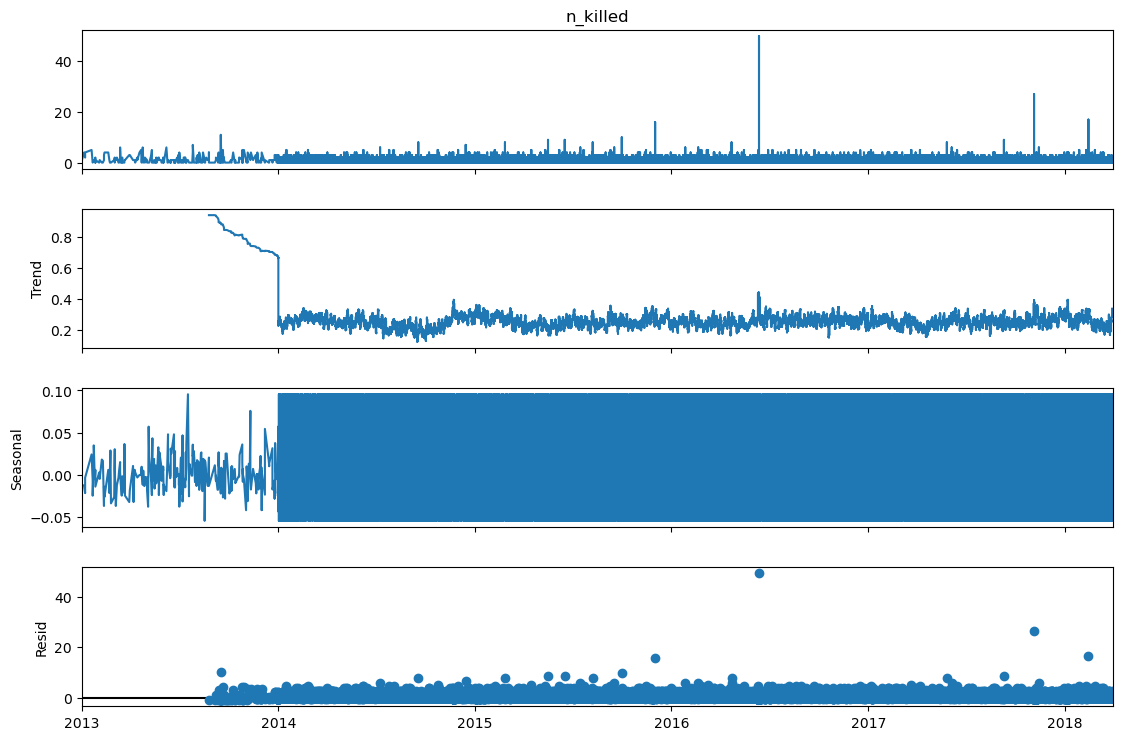

In [46]:
decomposition = sm.tsa.seasonal_decompose(df_subset['n_killed'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

### Interpretation of Decomposition
- **Trend**: Displays the overall movement in gun violence fatalities over time.
- **Seasonality**: Highlights recurring patterns within a given time period.
- **Residuals**: Shows irregularities that cannot be explained by trend or seasonality.

#  Dickey-Fuller Test for Stationarity

In [50]:
def adf_test(series):
    result = adfuller(series.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    
    if result[1] <= 0.05:
        print("Conclusion: The data is **stationary** (reject H0).")
    else:
        print("Conclusion: The data is **not stationary** (fail to reject H0).")

In [56]:
# Run the test
adf_test(df_subset['n_killed'])

ADF Statistic: -47.53786334269318
p-value: 0.0
Critical Values: {'1%': -3.4303772935468397, '5%': -2.8615520633975486, '10%': -2.566776420910891}
Conclusion: The data is **stationary** (reject H0).


###  Interpreting the Dickey-Fuller Test
- **H₀ (Null Hypothesis)**: The data **is not stationary** (it has a trend or seasonality).
- **H₁ (Alternative Hypothesis)**: The data **is stationary**.
- If **p-value < 0.05**, we reject **H₀** and conclude the data is stationary.


# Differencing

In [59]:
df_subset['n_killed_diff'] = df_subset['n_killed'].diff()

# Re-run the ADF test
adf_test(df_subset['n_killed_diff'])


ADF Statistic: -91.42487393067353
p-value: 0.0
Critical Values: {'1%': -3.4303772938885952, '5%': -2.8615520635486, '10%': -2.5667764209912898}
Conclusion: The data is **stationary** (reject H0).


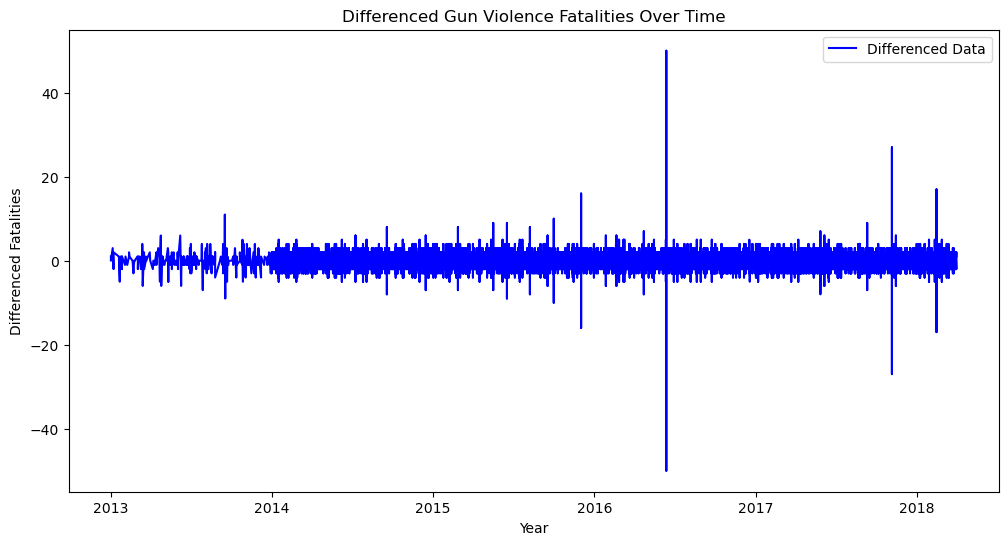

In [63]:
# Plot the differenced series
plt.figure(figsize=(12,6))
plt.plot(df_subset['n_killed_diff'], label="Differenced Data", color='blue')
plt.xlabel("Year")
plt.ylabel("Differenced Fatalities")
plt.title("Differenced Gun Violence Fatalities Over Time")
plt.legend()
plt.show()

###  Why Differencing is Applied
- If the **first ADF test failed (p-value > 0.05)**, differencing helps remove trends.
- If needed, another round of differencing can be applied.


# Autocorrelation Analysis

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

In [72]:
# Plot Autocorrelation Function (ACF)
plot_acf(df_subset['n_killed_diff'].dropna(), ax=axes[0])
axes[0].set_title("Autocorrelation Function")

Text(0.5, 1.0, 'Autocorrelation Function')

In [73]:
# Plot Partial Autocorrelation Function (PACF)
plot_pacf(df_subset['n_killed_diff'].dropna(), ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function")

Text(0.5, 1.0, 'Partial Autocorrelation Function')

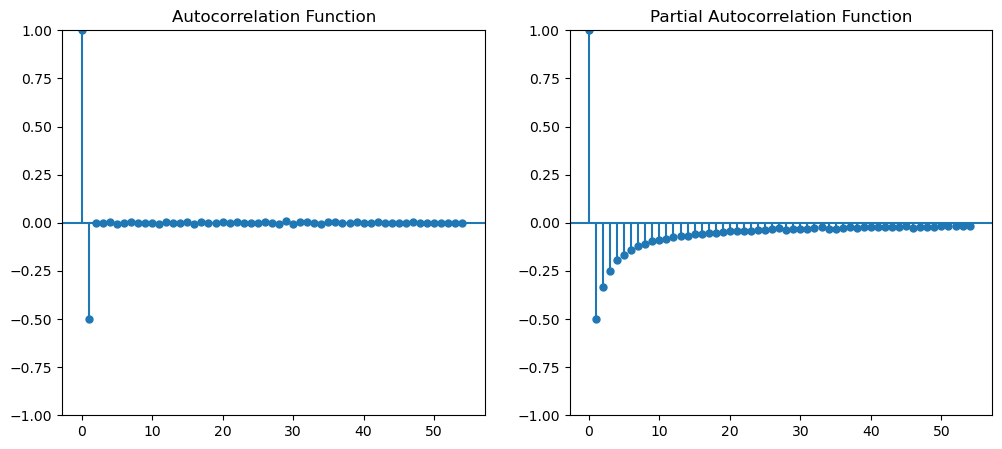

In [74]:
plt.show()

###  Understanding Autocorrelation & PACF
- **Autocorrelation (ACF)**: Shows how current values relate to past values.
- **Partial Autocorrelation (PACF)**: Helps determine lag values for ARIMA models.
- If ACF shows **gradual decay**, a differencing step may be necessary.